## ÌïúÍ∏Ä Íπ®Ïßê Î∞©ÏßÄ ÏΩîÎìú

In [ ]:
# matplotlib ÌïúÍ∏Ä Íπ®ÏßêÎ∞©ÏßÄ
# ÏïÑÎûòÏΩîÎìú Ïã§ÌñâÌõÑ 'Îü∞ÌÉÄÏûÑ Îã§ÏãúÏãúÏûë' ÌõÑ Î™®Îìà Î∂àÎü¨Ïò§Í∏∞
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 34 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (7,585 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 126101 files and dire

## Import data

In [ ]:
import pandas as pd
import nltk
from nltk import sent_tokenize, word_tokenize, pos_tag
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns


plt.rc('font', family='NanumBarunGothic') #matplotlib ÌïúÍ∏Ä Íπ®Ïßê Î∞©ÏßÄ

import warnings
warnings.filterwarnings(action='ignore')

In [ ]:
nltk.download('punkt')
nltk.download('punkt_tab')
# Download the required resource for pos_tag
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


True

In [ ]:
# Îç∞Ïù¥ÌÑ∞ Î°úÎìú
df = pd.read_csv('/content/drive/MyDrive/ESAA OB 2·Ñå·Ö©/·Ñë·Ö≥·ÑÖ·Ö©·Ñå·Ö¶·Ü®·Ñê·Ö≥ 2/data/train.csv')

In [ ]:
df.head()

index                                               text  author
0      0  He was almost choking. There was so much, so m...       3
1      1             ‚ÄúYour sister asked for it, I suppose?‚Äù       2
2      2   She was engaged one day as she walked, in per...       1
3      3  The captain was in the porch, keeping himself ...       4
4      4  ‚ÄúHave mercy, gentlemen!‚Äù odin flung up his han...       3

##05 ÌíàÏÇ¨Î≥Ñ Î∂ÑÌè¨ - ÌïúÏû¨Ìù¨

## 1. ÏûëÍ∞ÄÎ≥Ñ ÌíàÏÇ¨ Î∂ÑÌè¨ Ï∞®Ïù¥

### ÏûëÍ∞ÄÎ≥Ñ ÌíàÏÇ¨ Î∂ÑÌè¨ ÏÉÅÏúÑ 10Í∞ú

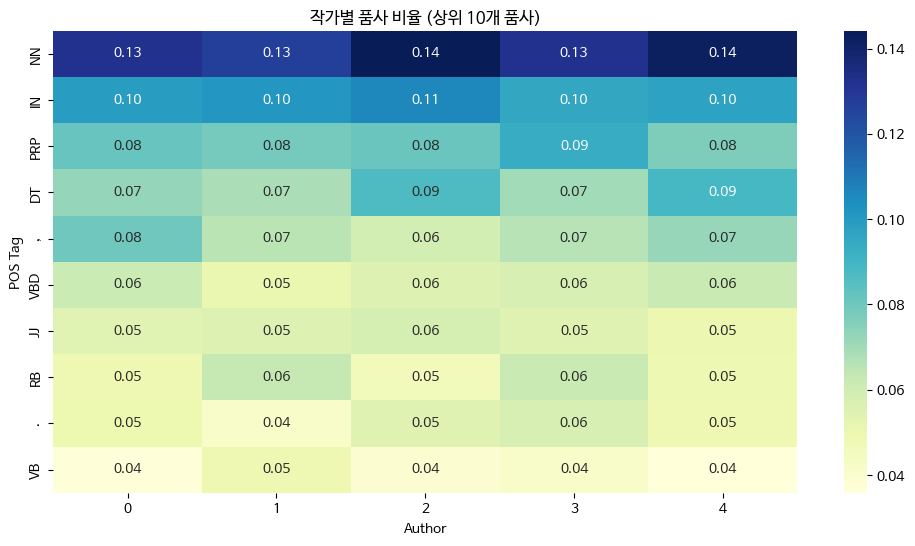

In [ ]:
# POS Î¶¨Ïä§Ìä∏ ÏÉùÏÑ±
df['pos'] = df['text'].apply(lambda x: [tag for _, tag in pos_tag(word_tokenize(str(x)))])

# ÏûëÍ∞ÄÎ≥Ñ ÌíàÏÇ¨ Ïπ¥Ïö¥Ìä∏
author_pos = df.groupby('author')['pos'].sum().apply(Counter)

# ÎπÑÏú® Ï†ïÍ∑úÌôî
author_pos_ratio = {
    author: {tag: count / sum(pos_counts.values())
             for tag, count in pos_counts.items()}
    for author, pos_counts in author_pos.items()
}

# DataFrame Î≥ÄÌôò
import pandas as pd
pos_df = pd.DataFrame(author_pos_ratio).fillna(0)

# ÏÉÅÏúÑ ÌíàÏÇ¨Îßå Î≥¥Í∏∞
top_tags = pos_df.sum(axis=1).sort_values(ascending=False).head(10).index
pos_df_top = pos_df.loc[top_tags]

# ÌûàÌä∏Îßµ ÏãúÍ∞ÅÌôî
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.heatmap(pos_df_top, annot=True, cmap='YlGnBu', fmt='.2f')
plt.title('ÏûëÍ∞ÄÎ≥Ñ ÌíàÏÇ¨ ÎπÑÏú® (ÏÉÅÏúÑ 10Í∞ú ÌíàÏÇ¨)')
plt.ylabel('POS Tag')
plt.xlabel('Author')
plt.show()

ÏÉÅÏúÑ 10Í∞ú

1. NN (Îã®Ïàò Î™ÖÏÇ¨)
2. IN (Ï†ÑÏπòÏÇ¨/Ï¢ÖÏÜçÏ†ëÏÜçÏÇ¨)
3. PRP (Ïù∏Ïπ≠ÎåÄÎ™ÖÏÇ¨)
4. DT (Í¥ÄÏÇ¨)
5. ,
6. VBD (ÎèôÏÇ¨ Í≥ºÍ±∞Ìòï)
7. JJ (ÏùºÎ∞ò ÌòïÏö©ÏÇ¨)
8. RB (ÏùºÎ∞ò Î∂ÄÏÇ¨)
9. .
10. VB (ÎèôÏÇ¨ ÏõêÌòï)



‚ùì 5, 9Î≤à Î¨∏Ïû• Î∂ÄÌò∏Ïù∏Îç∞ Ïù¥Í±∞ Ï†ÑÏ≤òÎ¶¨? Ìï†Í±¥Í∞ÄÏö§? ÎßåÏïΩ Ï†ÑÏ≤òÎ¶¨ ÏßÑÌñâÌïòÎ©¥ Îã§Î•∏ ÌíàÏÇ¨ ÎëêÍ∞úÍ∞Ä Ï∂îÍ∞ÄÎêòÏñ¥ÏÑú ÏóÖÎç∞Ïù¥Ìä∏ Îê† ÎìØ


‚ùì Í∑ºÎç∞ , Í∞ôÏùÄ Í≤ΩÏö∞ÏóêÎäî ÎßéÏù¥ Ïì∞Î©¥ 'Î¨∏Ïû• Í∏∏Ïù¥Í∞Ä Í∏∏Îã§' Í∞ôÏù¥ ÏûëÍ∞Ä ÌäπÏßïÏùÑ ÌôïÏù∏Ìï† Ïàò ÏûàÏùÑ Í≤É Í∞ôÏïÑÏÑú ÏÇ≠Ï†úÌïòÎäîÍ≤å ÎßûÎäîÏßÄ Í∂ÅÍ∏àÌï¥Ïó¨

### ÏûëÍ∞ÄÎ≥Ñ ÌíàÏÇ¨ Î∂ÑÌè¨ ÏûëÍ∞ÄÎ≥ÑÎ°ú ÏÉÅÏúÑ 10Í∞ú Îî∞Î°ú

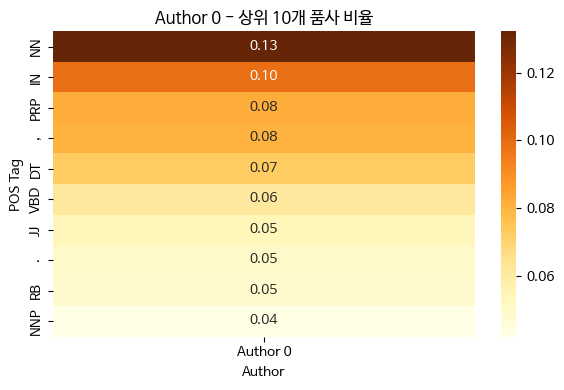

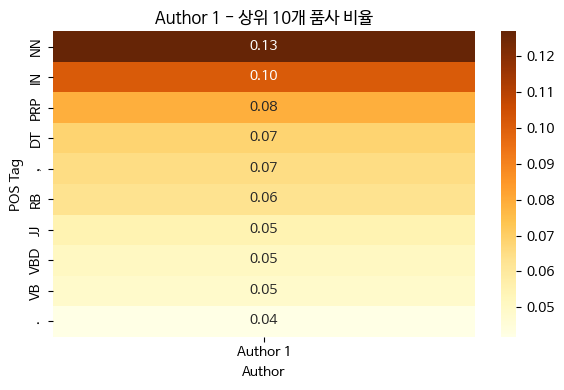

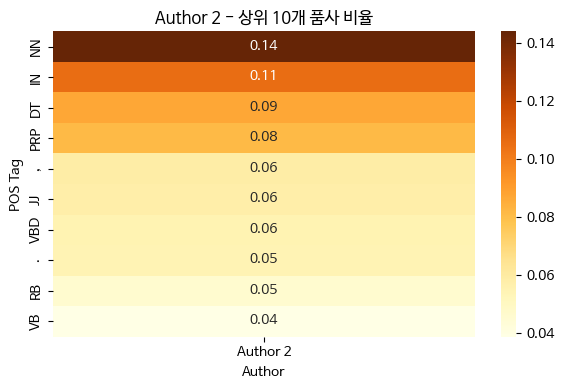

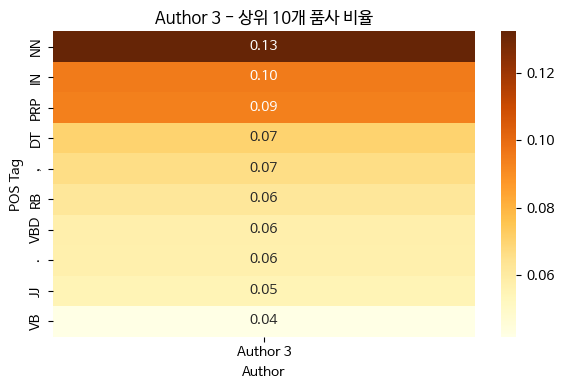

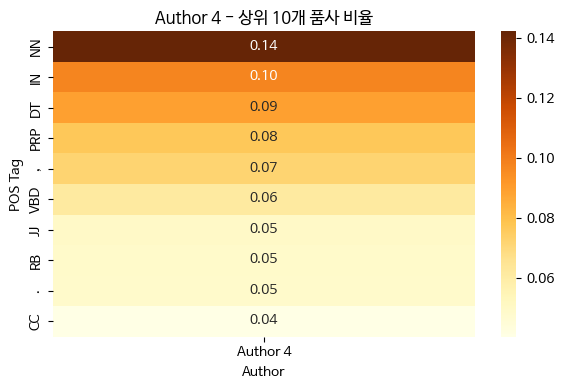

In [ ]:
# POS Î¶¨Ïä§Ìä∏ ÏÉùÏÑ±
df['pos'] = df['text'].apply(lambda x: [tag for _, tag in pos_tag(word_tokenize(str(x)))])
author_pos = df.groupby('author')['pos'].sum().apply(Counter)

# ÎπÑÏú® Ï†ïÍ∑úÌôî
author_pos_ratio = {
    author: {tag: count / sum(pos_counts.values())
             for tag, count in pos_counts.items()}
    for author, pos_counts in author_pos.items()
}

# ÏûëÍ∞ÄÎ≥Ñ ÏÉÅÏúÑ 10Í∞ú ÌíàÏÇ¨ Ï∂îÏ∂ú Î∞è ÏãúÍ∞ÅÌôî
for author, pos_ratio in author_pos_ratio.items():
    # Ï†ïÎ†¨Îêú ÏÉÅÏúÑ 10Í∞ú ÌíàÏÇ¨
    top_tags = dict(sorted(pos_ratio.items(), key=lambda x: x[1], reverse=True)[:10])

    # DataFrame ÏÉùÏÑ±
    temp_df = pd.DataFrame.from_dict(top_tags, orient='index', columns=[f'Author {author}'])

    # ÏãúÍ∞ÅÌôî
    plt.figure(figsize=(6, 4))
    sns.heatmap(temp_df, annot=True, cmap='YlOrBr', fmt='.2f')
    plt.title(f'Author {author} - ÏÉÅÏúÑ 10Í∞ú ÌíàÏÇ¨ ÎπÑÏú®')
    plt.ylabel('POS Tag')
    plt.xlabel('Author')
    plt.tight_layout()
    plt.show()

ÏÉÅÏúÑ 10Í∞ú ÌñàÏùÑÎïå ÏûëÍ∞ÄÎ≥ÑÎ°ú ÌÅ¨Í≤å Ï∞®Ïù¥Í∞Ä ÏïàÎÇòÎäîÍ±∞ Í∞ôÏïÑÏÑú ÏûëÍ∞ÄÎßàÎã§ ÏÉÅÏúÑ 10Í∞úÎ•º Îî∞Î°ú Ï∂úÎ†•ÌïòÎäî ÏΩîÎìúÎ•º Ìï¥Î¥§ÎäîÎç∞ GPT Î¨ºÏñ¥Î≥¥ÎãàÍπå Ìï¥ÏÑù Ïñ¥Î†§ÏõÄ, Î™®Îç∏ Î≥µÏû°ÎèÑ ÎïåÎ¨∏Ïóê Ïç© Ï∂îÏ≤úÌïòÏßÄ ÏïäÎäîÎã§Îäî ÎäêÎÇåÏúºÎ°ú ÏïåÎ†§Ï§å

### ÌíàÏÇ¨ Ïπ¥ÌÖåÍ≥†Î¶¨ Î≥ÄÌôò ÌõÑ ÏûëÍ∞ÄÎ≥Ñ ÏÇ¨Ïö© Î∂ÑÌè¨ ÌôïÏù∏

In [ ]:
# ÌíàÏÇ¨ Í∑∏Î£π Ï†ïÏùò
pos_category_map = {
    'NN': 'Noun', 'NNS': 'Noun', 'NNP': 'Noun', 'NNPS': 'Noun',
    'VB': 'Verb', 'VBD': 'Verb', 'VBG': 'Verb', 'VBN': 'Verb', 'VBP': 'Verb', 'VBZ': 'Verb',
    'JJ': 'Adjective', 'JJR': 'Adjective', 'JJS': 'Adjective',
    'RB': 'Adverb', 'RBR': 'Adverb', 'RBS': 'Adverb',
    'PRP': 'Pronoun', 'PRP$': 'Pronoun', 'WP': 'Pronoun', 'WP$': 'Pronoun',
    'IN': 'Preposition/Conjunction', 'CC': 'Preposition/Conjunction', 'DT': 'Preposition/Conjunction',
    'TO': 'Preposition/Conjunction', 'MD': 'Preposition/Conjunction', 'RP': 'Preposition/Conjunction',
    '.': 'Punctuation', ',': 'Punctuation', ':': 'Punctuation', ';': 'Punctuation',
    '!': 'Punctuation', '?': 'Punctuation', '``': 'Punctuation', "''": 'Punctuation'
}

In [ ]:
from nltk import word_tokenize, pos_tag
from collections import Counter
import pandas as pd

# ÌÖçÏä§Ìä∏Î•º ÌíàÏÇ¨ Ïπ¥ÌÖåÍ≥†Î¶¨Î°ú Î≥ÄÌôò
def get_pos_categories(text):
    tokens = word_tokenize(str(text))
    tags = pos_tag(tokens)
    categories = [pos_category_map.get(tag, 'Other') for word, tag in tags]
    return categories

# Ï†ÅÏö©ÌïòÏó¨ Í∞Å ÏûëÍ∞ÄÏùò Ïπ¥ÌÖåÍ≥†Î¶¨Î≥Ñ ÌíàÏÇ¨ Ï∂îÏ∂ú
df['pos_cat'] = df['text'].apply(get_pos_categories)

In [ ]:
# ÏûëÍ∞ÄÎ≥Ñ ÌíàÏÇ¨ Ïπ¥ÌÖåÍ≥†Î¶¨ Ìï©ÏÇ∞
author_pos_cat = df.groupby('author')['pos_cat'].sum().apply(Counter)

# ÎπÑÏú®Î°ú Ï†ïÍ∑úÌôî
author_cat_ratio = {
    author: {cat: count / sum(cat_counts.values())
             for cat, count in cat_counts.items()}
    for author, cat_counts in author_pos_cat.items()
}

# DataFrame Î≥ÄÌôò
cat_df = pd.DataFrame(author_cat_ratio).fillna(0)

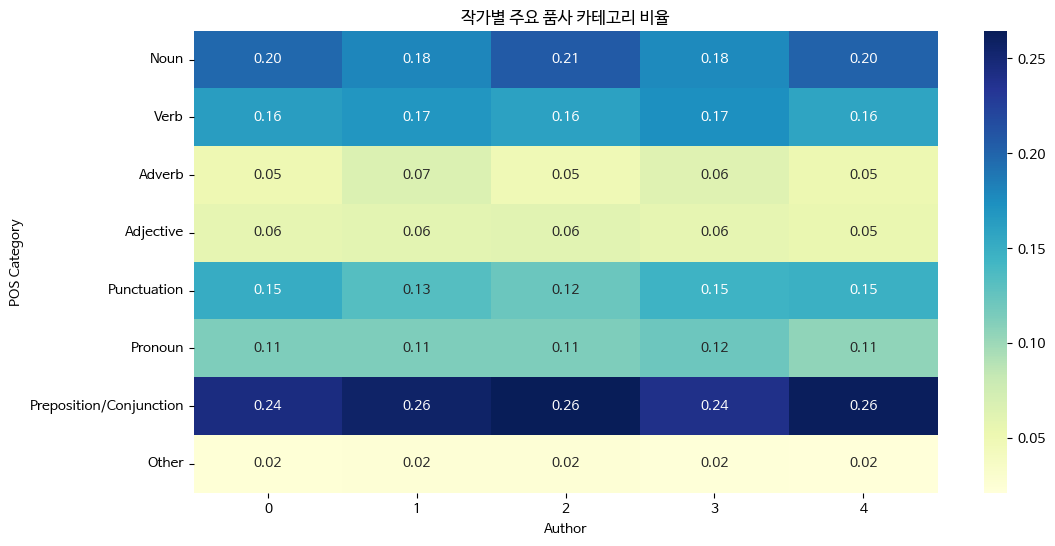

In [ ]:
# ÌûàÌä∏Îßµ ÏãúÍ∞ÅÌôî
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.heatmap(cat_df, annot=True, cmap='YlGnBu', fmt='.2f')
plt.title('ÏûëÍ∞ÄÎ≥Ñ Ï£ºÏöî ÌíàÏÇ¨ Ïπ¥ÌÖåÍ≥†Î¶¨ ÎπÑÏú®')
plt.ylabel('POS Category')
plt.xlabel('Author')
plt.show()

Ïù¥Í≤ÉÎèÑ ÌòπÏãúÎÇò Ìï¥ÏÑú Ìï¥Î¥§ÎäîÎç∞ ÎèôÏÇ¨ Í∞ôÏù¥ Í≥ºÍ±∞ÎèôÏÇ¨, ÌòÑÏû¨ÏßÑÌñâÌòï ÎèôÏÇ¨ Îì± Í∞ÅÍ∞ÅÏù¥ Í∞ñÎäî ÏùòÎØ∏Î•º ÌïúÎ≤àÏóê ÎèôÏÇ¨Î°ú ÌâÅÏπòÎäîÍ±∞Ïó¨ÏÑú Í∑∏Î†áÍ≤å Ï¢ãÏùÄÍ±∞ Í∞ôÏßÄÎäî ÏïäÏïÑÏö§....

##  2. Î¨∏Ïû• Íµ¨Ï°∞ Î≥µÏû°ÏÑ± ÏßÄÌëú (IN, CC, DT, , Îì±)

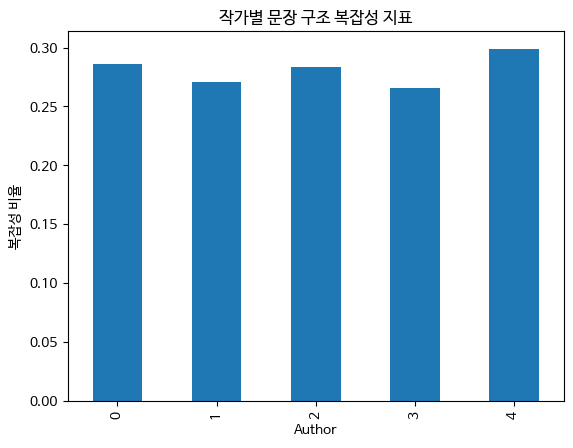

In [ ]:
complex_tags = ['IN', 'CC', 'DT', ',']  # ÏàòÏãù/Ï†ëÏÜç Í¥ÄÎ†® ÌíàÏÇ¨
complexity_ratio = {
    author: sum(pos_counts.get(tag, 0) for tag in complex_tags) / sum(pos_counts.values())
    for author, pos_counts in author_pos.items()
}

pd.Series(complexity_ratio).plot(kind='bar', title='ÏûëÍ∞ÄÎ≥Ñ Î¨∏Ïû• Íµ¨Ï°∞ Î≥µÏû°ÏÑ± ÏßÄÌëú')
plt.ylabel('Î≥µÏû°ÏÑ± ÎπÑÏú®')
plt.xlabel('Author')
plt.show()

## 3. POS Tag n-gram (2-gram) Ï°∞Ìï© ÎπàÎèÑ

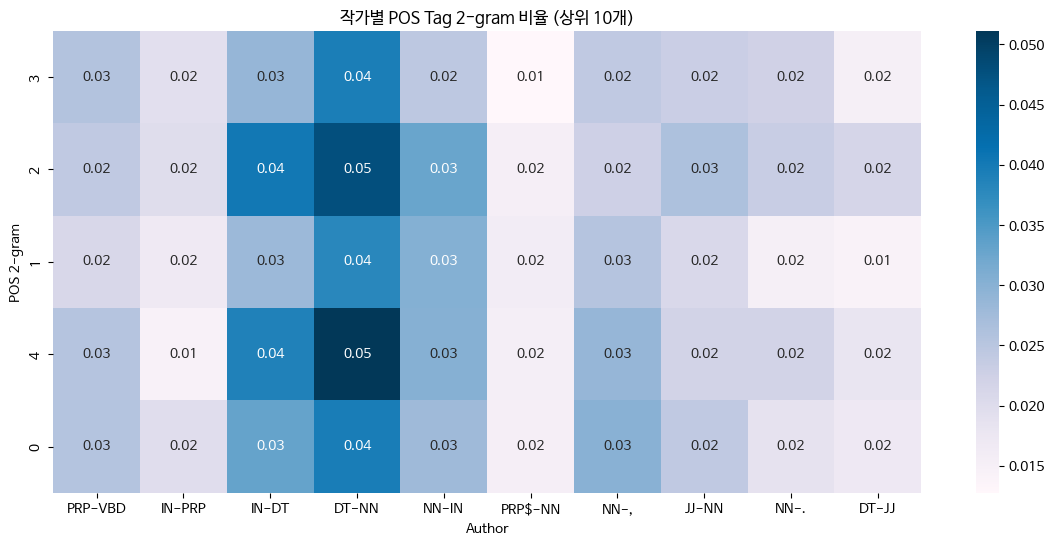

In [ ]:
from nltk.util import ngrams
from collections import defaultdict

author_bigram = defaultdict(Counter)

for i, row in df.iterrows():
    author = row['author']
    pos_tags = row['pos']
    bigrams = ngrams(pos_tags, 2)
    author_bigram[author].update(bigrams)

# ÏÉÅÏúÑ bigram Ï∂îÏ∂ú
top_bigrams = Counter()
for bigrams in author_bigram.values():
    top_bigrams.update(bigrams)
top_10_bigrams = dict(top_bigrams.most_common(10))

# ÏûëÍ∞ÄÎ≥Ñ ÏÉÅÏúÑ bigram ÎπÑÏú®
bigram_ratio_df = pd.DataFrame({
    author: {bg: count / sum(counter.values()) for bg, count in counter.items() if bg in top_10_bigrams}
    for author, counter in author_bigram.items()
}).fillna(0)

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(14, 6))
sns.heatmap(bigram_ratio_df.T, annot=True, fmt='.2f', cmap='PuBu')
plt.title('ÏûëÍ∞ÄÎ≥Ñ POS Tag 2-gram ÎπÑÏú® (ÏÉÅÏúÑ 10Í∞ú)')
plt.ylabel('POS 2-gram')
plt.xlabel('Author')
plt.show()

- PRP - VBD : Ïù∏Ïπ≠ÎåÄÎ™ÖÏÇ¨ + Í≥ºÍ±∞ÎèôÏÇ¨ / ‚Äúhe went‚Äù

- IN - PRP : Ï†ÑÏπòÏÇ¨ + Ïù∏Ïπ≠ÎåÄÎ™ÖÏÇ¨ / ‚Äúto him‚Äù

- IN - DT : Ï†ÑÏπòÏÇ¨ + Í¥ÄÏÇ¨ / ‚Äúfor a‚Äù

- DT - NN : Í¥ÄÏÇ¨ + Î™ÖÏÇ¨ / ‚Äúa man‚Äù

- NN - IN : Î™ÖÏÇ¨ + Ï†ÑÏπòÏÇ¨ / "house on"

- PRP$ - NN : ÏÜåÏú†ÎåÄÎ™ÖÏÇ¨ + Î™ÖÏÇ¨ / "his car"

- NN - , : Î™ÖÏÇ¨ + ÏâºÌëú / "John, who.."

- JJ - NN : ÌòïÏö©ÏÇ¨ + Î™ÖÏÇ¨ / "blue sky"

- NN - . : Î™ÖÏÇ¨ + ÎßàÏπ®Ìëú / "dog."

- DT - JJ : Í¥ÄÏÇ¨ + ÌòïÏö©ÏÇ¨ / "a big"

## ÏßÄÌîºÌã∞ ÎèÑÏõÄÏùÑ Î∞õÏùÄ Í∑∏ÎûòÌîÑÎ•º ÌÜµÌï¥ Ïïå Ïàò ÏûàÎäî ÏûëÍ∞ÄÎ≥Ñ ÌäπÏßï

üîπ Author 0

‚Ä¢	ÌíàÏÇ¨ ÎπÑÏú®: ÏùºÎ∞ò Î™ÖÏÇ¨(NN), Ï†ÑÏπòÏÇ¨(IN), Ïù∏Ïπ≠ÎåÄÎ™ÖÏÇ¨(PRP) ÎπÑÏú®Ïù¥ ÎÜíÏùå.

‚Ä¢	POS 2-gram: DT‚ÜíNN, IN‚ÜíDT, PRP‚ÜíVBDÏôÄ Í∞ôÏùÄ Íµ¨Î¨∏ Íµ¨Ï°∞Í∞Ä ÎßéÏù¥ ÎÇòÌÉÄÎÇ®. Î¨∏Ïû•Ïù¥ Ï£ºÏñ¥+ÎèôÏÇ¨ Íµ¨Ï°∞Î•º ÏûêÏ£º Îî∞Î¶Ñ.

‚Ä¢	Î¨∏Ïû• Íµ¨Ï°∞ Î≥µÏû°ÏÑ±: ÏïΩ 0.29, Îã§ÏÑØ ÏûëÍ∞Ä Ï§ë Îëê Î≤àÏß∏Î°ú ÎÜíÏùÄ ÏàòÏ§Ä.

‚Ä¢	Ï¢ÖÌï© ÌäπÏßï: Î¨∏Î≤ïÏ†ÅÏúºÎ°ú ÏïàÏ†ïÎêú Íµ¨Ï°∞ ÏÇ¨Ïö©. Î™ÖÏÇ¨Íµ¨ Ï§ëÏã¨, Ï£ºÏñ¥ Ï§ëÏã¨Ïùò Î¨∏Ïû• Íµ¨ÏÑ±.

üîπ Author 1

‚Ä¢	ÌíàÏÇ¨ ÎπÑÏú®: DT(Í¥ÄÏÇ¨)ÏôÄ RB(Î∂ÄÏÇ¨)Ïùò ÎπÑÏú®Ïù¥ ÎπÑÍµêÏ†Å ÎÜíÏùÄ Ìé∏. JJ(ÌòïÏö©ÏÇ¨), VB(ÎèôÏÇ¨)ÎèÑ Í≥†Î•¥Í≤å ÏÇ¨Ïö©Îê®.

‚Ä¢	POS 2-gram: IN‚ÜíPRP, IN‚ÜíDT, DT‚ÜíNN Ï°∞Ìï©Ïù¥ ÎßéÏïÑ Ï†ÑÏπòÏÇ¨Íµ¨ ÏÇ¨Ïö©Ïù¥ ÎëêÎìúÎü¨Ïßê.

‚Ä¢	Î¨∏Ïû• Íµ¨Ï°∞ Î≥µÏû°ÏÑ±: ÏïΩ 0.27Î°ú Ï§ëÌïòÏúÑÍ∂å.

‚Ä¢	Ï¢ÖÌï© ÌäπÏßï: Î∂ÄÏÇ¨ÏôÄ Í¥ÄÏÇ¨Î•º ÌôúÏö©Ìï¥ ÏàòÏãùÏù¥ ÎßéÏùÄ Î¨∏Ïû•ÏùÑ Íµ¨ÏÑ±. Íµ¨Ï°∞Îäî Îã®ÏàúÌïú Ìé∏Ïù¥ÎÇò ÏàòÏãùÏñ¥ ÏÇ¨Ïö© ÎπàÎèÑÍ∞Ä ÎÜíÏùå.

üîπ Author 2

‚Ä¢	ÌíàÏÇ¨ ÎπÑÏú®: NN ÎπÑÏú® Í∞ÄÏû• ÎÜíÏùå (0.14), DTÎèÑ ÎÜíÏïÑ Î™ÖÏÇ¨Íµ¨ Ï§ëÏã¨ Î¨∏Ïû• ÎëêÎìúÎü¨Ïßê.

‚Ä¢	POS 2-gram: DT‚ÜíNN, IN‚ÜíDT Îì± Ï†ÑÌòïÏ†ÅÏù∏ Î™ÖÏÇ¨Íµ¨ Íµ¨Ï°∞ + PRP$‚ÜíNN(ÏÜåÏú†Í≤© + Î™ÖÏÇ¨) ÎÜíÏùÄ ÏÇ¨Ïö©.

‚Ä¢	Î¨∏Ïû• Íµ¨Ï°∞ Î≥µÏû°ÏÑ±: ÏïΩ 0.28, ÌèâÍ∑† ÏàòÏ§Ä.

‚Ä¢	Ï¢ÖÌï© ÌäπÏßï: Î™ÖÏÇ¨Íµ¨ ÌôúÏö©Ïù¥ Í∞ÄÏû• ÌôúÎ∞úÌïòÎ©∞, ÏÜåÏú† Íµ¨Ï°∞ÎèÑ ÏûêÏ£º ÏÇ¨Ïö©. Î¨∏Î≤ï Íµ¨Ï°∞Îäî ÎπÑÍµêÏ†Å Ï†ÑÌòïÏ†ÅÏù¥Í≥† Î™ÖÌôïÌï®.

üîπ Author 3

‚Ä¢	ÌíàÏÇ¨ ÎπÑÏú®: PRP, DT, JJÏùò ÏÇ¨Ïö©Ïù¥ Í≥†Î•¥Í≤å Î∂ÑÌè¨Îê®.

‚Ä¢	POS 2-gram: NN‚ÜíIN, NN‚Üí,(ÏâºÌëú), JJ‚ÜíNN ÎπàÎèÑ ÎÜíÏïÑ ÏàòÏãùÏñ¥ + ÏÇΩÏûÖÍµ¨Î¨∏Ïù¥ ÎßéÏùÄ Î¨∏Ïû• Íµ¨ÏÇ¨.

‚Ä¢	Î¨∏Ïû• Íµ¨Ï°∞ Î≥µÏû°ÏÑ±: 0.265, Îã§ÏÑØ ÏûëÍ∞Ä Ï§ë Í∞ÄÏû• ÎÇÆÏùÄ ÏàòÏ§Ä.

‚Ä¢	Ï¢ÖÌï© ÌäπÏßï: ÏàòÏãùÏùÄ ÌíçÎ∂ÄÌïòÏßÄÎßå Î¨∏Ïû• ÏûêÏ≤¥Îäî Îã®ÏàúÌïú Íµ¨Ï°∞. ÏÇΩÏûÖÏù¥ÎÇò ÏâºÌëú ÏÇ¨Ïö©Ïù¥ ÎßéÏùå.

üîπ Author 4

‚Ä¢	ÌíàÏÇ¨ ÎπÑÏú®: NN, DT, JJ ÎπÑÏú® ÎÜíÍ≥† PRP ÏÉÅÎåÄÏ†ÅÏúºÎ°ú ÎÇÆÏùå.

‚Ä¢	POS 2-gram: NN‚ÜíIN, JJ‚ÜíNN, DT‚ÜíJJ ÏûêÏ£º Îì±Ïû• ‚Üí ÌòïÏö©ÏÇ¨ Ï§ëÏã¨ ÏàòÏãù + Î™ÖÏÇ¨Íµ¨ Íµ¨Ï°∞ ÌíçÎ∂Ä.

‚Ä¢	Î¨∏Ïû• Íµ¨Ï°∞ Î≥µÏû°ÏÑ±: 0.30, Îã§ÏÑØ Î™Ö Ï§ë Í∞ÄÏû• ÎÜíÏùå.

‚Ä¢	Ï¢ÖÌï© ÌäπÏßï: Î≥µÏû°Ìïú Î¨∏Ïû• Íµ¨Ï°∞, ÌòïÏö©ÏÇ¨/Ï†ÑÏπòÏÇ¨Íµ¨ ÌôúÏö© ÎßéÏùå. Î¨∏Ï≤¥Í∞Ä Í∞ÄÏû• Î¨∏Î≤ïÏ†ÅÏúºÎ°ú Î≥µÏû°ÌïòÎ©∞ ÏÑ∏Î†®Îê®.

## Î™®Îç∏ÎßÅ ÏΩîÎìú

In [ ]:
import pandas as pd
import nltk
from collections import Counter
from nltk import pos_tag, word_tokenize, bigrams
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

# NLTK Î¶¨ÏÜåÏä§ Îã§Ïö¥Î°úÎìú
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')


def extract_features(text):
    tokens = word_tokenize(text)
    tagged = pos_tag(tokens)
    pos_tags = [tag for word, tag in tagged]

    # 1. POS ÌÉúÍ∑∏ ÎπÑÏú®
    pos_counts = Counter(pos_tags)
    total = sum(pos_counts.values())
    pos_ratio = {f'pos_{k}': v / total for k, v in pos_counts.items()}

    # 2. POS 2-gram ÎπÑÏú®
    pos_bigrams = list(bigrams(pos_tags))
    bigram_counts = Counter(pos_bigrams)
    total_bigrams = sum(bigram_counts.values())
    pos_bigram = {
        f'bigram_{"-".join(k)}': v / total_bigrams for k, v in bigram_counts.items()
    }

    # 3. Î≥µÏû°ÏÑ± ÏßÄÌëú (IN, DT, CC, ,)
    complex_tags = ['IN', 'DT', 'CC', ',']
    complex_count = sum(pos_counts[tag] for tag in complex_tags if tag in pos_counts)
    complexity_ratio = {'complex_ratio': complex_count / total if total > 0 else 0}

    # Î™®Îì† feature Í≤∞Ìï©
    features = {}
    features.update(pos_ratio)
    features.update(pos_bigram)
    features.update(complexity_ratio)
    return features

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [ ]:
# ÌäπÏßï Ï∂îÏ∂ú
feature_list = [extract_features(text) for text in df['text']]
feature_df = pd.DataFrame(feature_list).fillna(0)

# Ï†ïÍ∑úÌôî
scaler = StandardScaler()
X = scaler.fit_transform(feature_df)

# Î†àÏù¥Î∏î
y = df['author']

# Îç∞Ïù¥ÌÑ∞ Î∂ÑÌï†
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Î™®Îç∏ ÌïôÏäµ
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# ÏòàÏ∏° Î∞è ÌèâÍ∞Ä
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.52      0.60      0.56      2678
           1       0.61      0.30      0.41      1422
           2       0.52      0.54      0.53      2307
           3       0.51      0.72      0.60      2995
           4       0.59      0.23      0.33      1574

    accuracy                           0.53     10976
   macro avg       0.55      0.48      0.48     10976
weighted avg       0.54      0.53      0.51     10976



In [ ]:
from sklearn.metrics import log_loss

# ÏòàÏ∏° ÌôïÎ•† Í≥ÑÏÇ∞
y_proba = clf.predict_proba(X_test)

# log loss Í≥ÑÏÇ∞
print("Log Loss:", log_loss(y_test, y_proba))

Log Loss: 1.2594379294554285
